In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Specify dtype option on import or set low_memory=False.
pd.options.mode.chained_assignment = None  # default='warn'

import math
import scipy

# Datviz purposes
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

In [106]:
try :
    train_data = pd.read_csv("/kaggle/input/penyisihan-joints-data-competition-2023/train.csv", low_memory=False)
    test_data = pd.read_csv("/kaggle/input/penyisihan-joints-data-competition-2023/test.csv", low_memory=False) # For Kaggle

except :
    train_data = pd.read_csv("../2-DataInterpolation/train_data.csv", low_memory=False)
    test_data = pd.read_csv("../2-DataInterpolation/test_data.csv", low_memory=False) # For local development

In [107]:
train_data.head()

,floors_before_eq(total),old_building,plinth_area(ft^2),height_before_eq(ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade,ismorethanplintharea,reconstruction,major_repair,minor_repair,no_need
0,2.0,1.0,256.0,22.0,flat,bamboo_or_timber,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,0.0,0.0,1.0,0,0,0,0,0
1,3.0,3.0,985.0,18.0,flat,mixed,bamboo_or_timber_heavy,clay_mud,wood_or_bambo_mud,0.0,square,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,5.0,0,0,0,0,0
2,2.0,7.0,300.0,14.0,flat,mixed,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,5.0,0,0,0,0,0
3,2.0,18.0,185.0,15.0,flat,mixed,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,4.0,0,0,0,0,0
4,2.0,22.0,290.0,17.0,flat,mixed,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,1.0,0,0,0,0,0


Text(0.5, 1.0, 'Damage Grade Distribution')

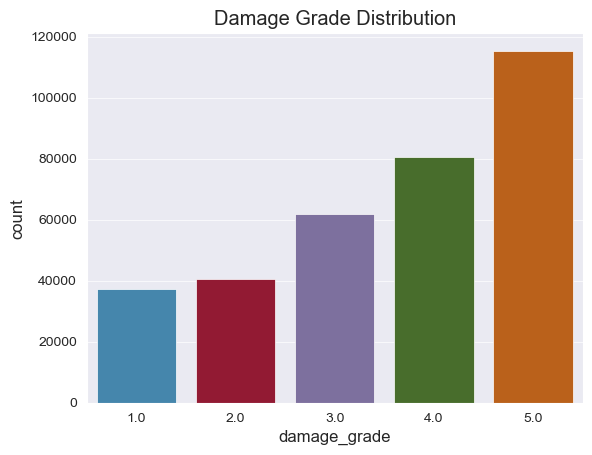

In [108]:
sns.countplot(data = train_data, x = train_data['damage_grade'])
plt.title('Damage Grade Distribution')

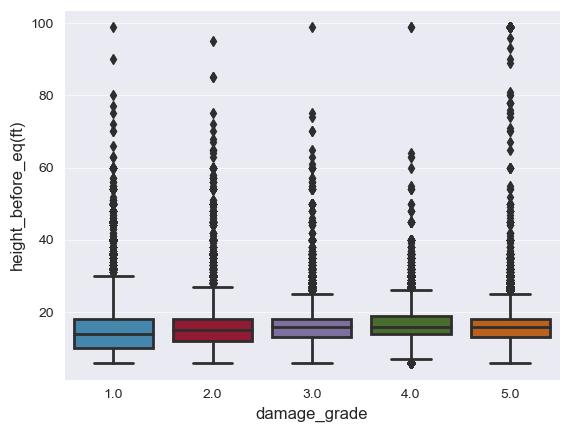

In [109]:
tr = train_data.drop(train_data['old_building'].index[train_data['old_building'] == 999])
sns.boxplot(data = tr, x = tr['damage_grade'], y =tr['height_before_eq(ft)'])
plt.show()

outlier segede utang negara 

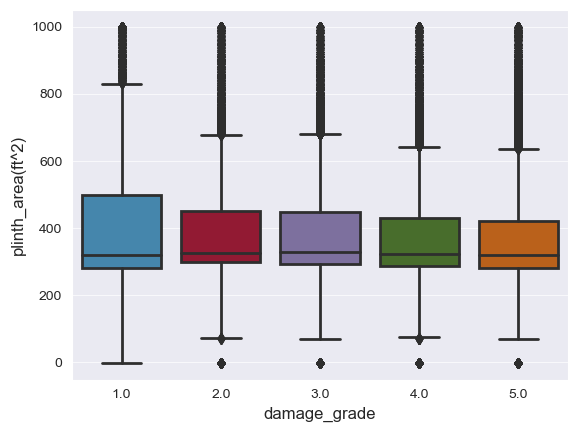

In [110]:
sns.boxplot(data = tr, x = tr['damage_grade'], y =tr['plinth_area(ft^2)'])
plt.show()

In [111]:
correlate = pd.DataFrame(
    index=['1', '2','3','4','5'], 
    columns=train_data['type_of_foundation'].unique(), 
)

for j  in train_data['type_of_foundation'].unique():
    try : 
        
        correlate.loc[correlate.index == '1', j]= np.round(sum((train_data['type_of_foundation']==j)&(train_data['damage_grade']==1))/sum(train_data['type_of_foundation']==j) * 100, 3)
        correlate.loc[correlate.index == '2', j]= np.round(sum((train_data['type_of_foundation']==j)&(train_data['damage_grade']==2))/sum(train_data['type_of_foundation']==j) * 100, 3)
        correlate.loc[correlate.index == '3', j]= np.round(sum((train_data['type_of_foundation']==j)&(train_data['damage_grade']==3))/sum(train_data['type_of_foundation']==j) * 100, 3)
        correlate.loc[correlate.index == '4', j]= np.round(sum((train_data['type_of_foundation']==j)&(train_data['damage_grade']==4))/sum(train_data['type_of_foundation']==j) * 100, 3)
        correlate.loc[correlate.index == '5', j]= np.round(sum((train_data['type_of_foundation']==j)&(train_data['damage_grade']==5))/sum(train_data['type_of_foundation']==j) * 100, 3)
    except :
        pass
correlate

,bamboo_or_timber,mixed,rc,cement_stone_or_cement_brick,other
1,29.915,5.071,58.8,29.402,30.484
2,23.084,9.471,27.392,22.053,8.774
3,22.81,18.531,9.962,18.343,10.267
4,14.974,26.88,2.205,14.392,15.378
5,9.217,40.047,1.641,15.81,35.097


<AxesSubplot:title={'center':'Damage Grade Distribution by Type of Foundation'}>

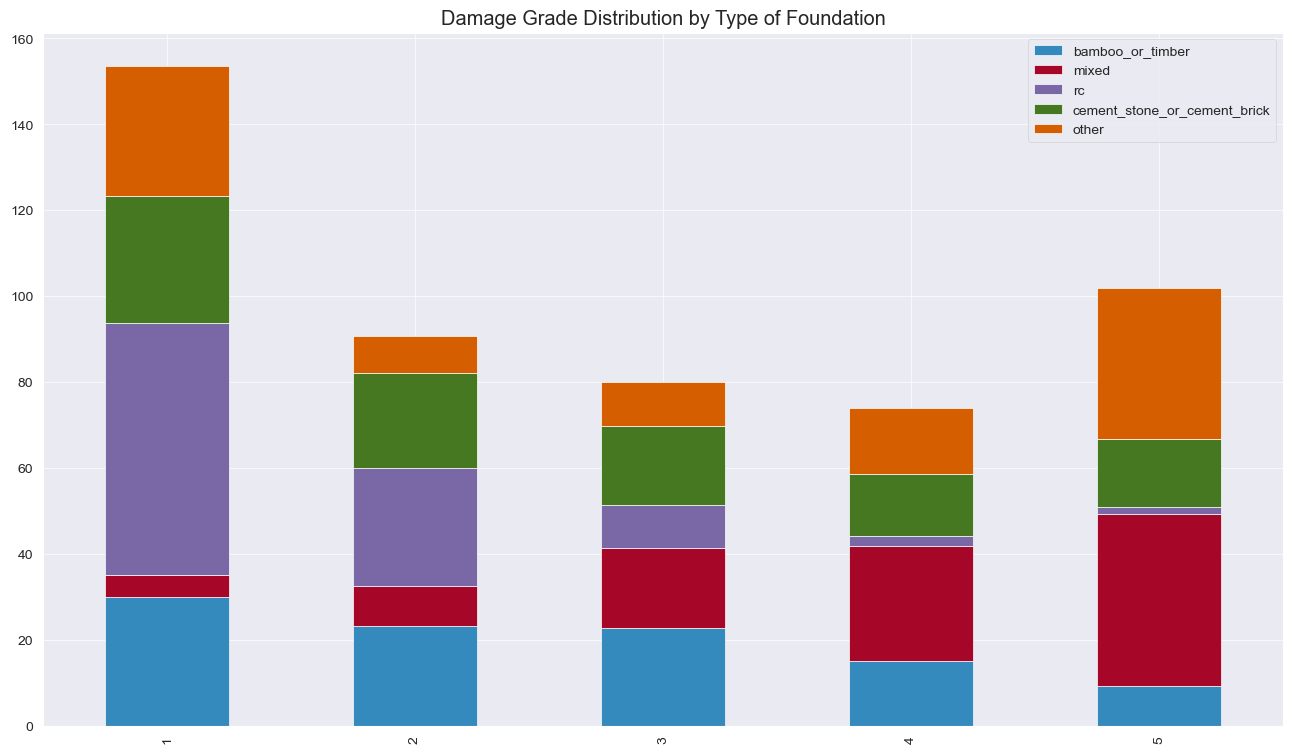

In [112]:
correlate.iloc[0:,:].plot(kind='bar', stacked=True, figsize=(16,9), title='Damage Grade Distribution by Type of Foundation')

In [113]:
correlate = pd.DataFrame(
    index=['1', '2','3','4','5'], 
    columns=tr['type_of_ground_floor'].unique(), 
)

for j  in tr['type_of_ground_floor'].unique():
    try : 
        
        correlate.loc[correlate.index == '1', j]= np.round(sum((tr['type_of_ground_floor']==j)&(tr['damage_grade']==1))/sum(tr['type_of_ground_floor']==j) * 100, 3)
        correlate.loc[correlate.index == '2', j]= np.round(sum((tr['type_of_ground_floor']==j)&(tr['damage_grade']==2))/sum(tr['type_of_ground_floor']==j) * 100, 3)
        correlate.loc[correlate.index == '3', j]= np.round(sum((tr['type_of_ground_floor']==j)&(tr['damage_grade']==3))/sum(tr['type_of_ground_floor']==j) * 100, 3)
        correlate.loc[correlate.index == '4', j]= np.round(sum((tr['type_of_ground_floor']==j)&(tr['damage_grade']==4))/sum(tr['type_of_ground_floor']==j) * 100, 3)
        correlate.loc[correlate.index == '5', j]= np.round(sum((tr['type_of_ground_floor']==j)&(tr['damage_grade']==5))/sum(tr['type_of_ground_floor']==j) * 100, 3)
    except :
        pass
correlate

,clay_mud,brick_or_stone,rc,other,wood
1,6.905,9.23,45.644,27.132,18.797
2,10.316,10.411,27.608,17.248,17.481
3,19.061,16.52,15.0,23.45,15.1
4,26.074,25.029,6.843,17.248,20.175
5,37.645,38.81,4.905,14.922,28.446


<AxesSubplot:title={'center':'Damage Grade Distribution by Type of Ground Floor'}>

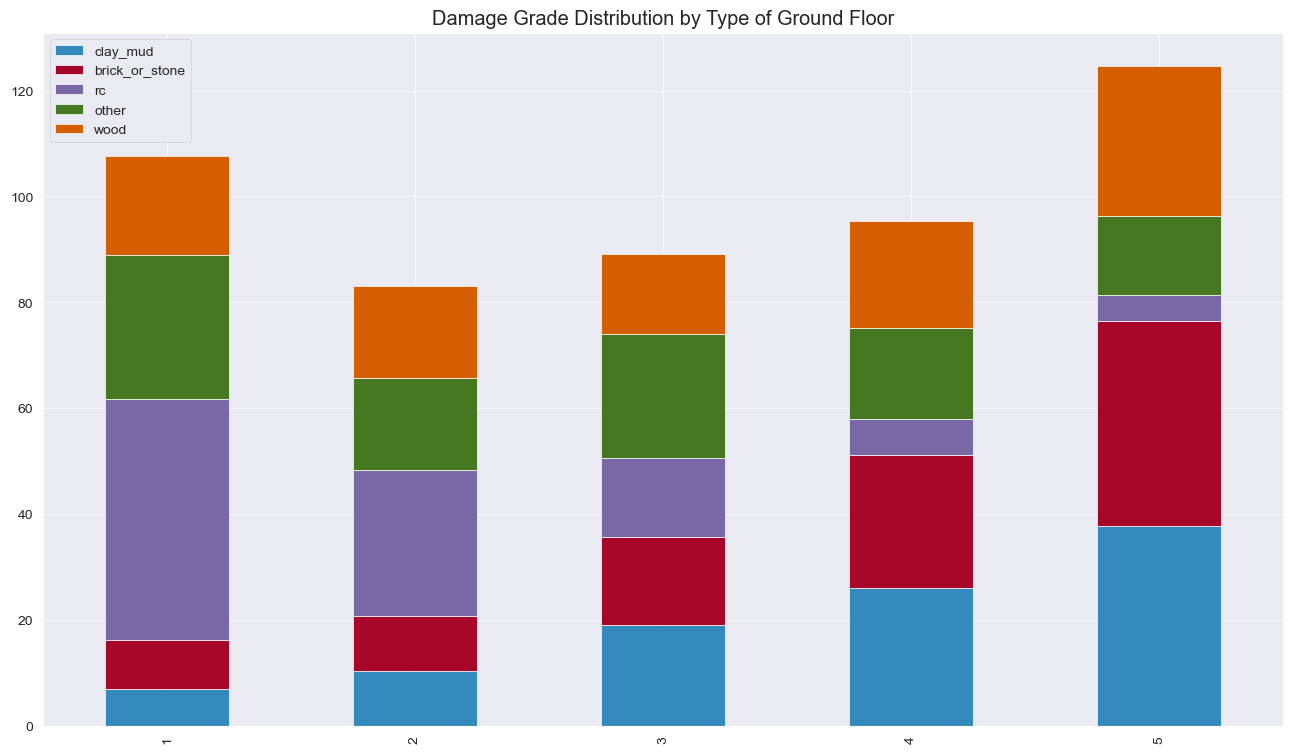

In [114]:
correlate.iloc[0:,:].plot(kind='bar', stacked=True, figsize=(16,9), title='Damage Grade Distribution by Type of Ground Floor')

In [115]:
test_data['type_of_foundation'].unique()

array(['mixed', 'bamboo_or_timber', 'rc', 'cement_stone_or_cement_brick',
       'other'], dtype=object)

In [116]:
train_data.head()

,floors_before_eq(total),old_building,plinth_area(ft^2),height_before_eq(ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade,ismorethanplintharea,reconstruction,major_repair,minor_repair,no_need
0,2.0,1.0,256.0,22.0,flat,bamboo_or_timber,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,0.0,0.0,1.0,0,0,0,0,0
1,3.0,3.0,985.0,18.0,flat,mixed,bamboo_or_timber_heavy,clay_mud,wood_or_bambo_mud,0.0,square,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,5.0,0,0,0,0,0
2,2.0,7.0,300.0,14.0,flat,mixed,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,5.0,0,0,0,0,0
3,2.0,18.0,185.0,15.0,flat,mixed,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,4.0,0,0,0,0,0
4,2.0,22.0,290.0,17.0,flat,mixed,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,1.0,0,0,0,0,0


In [117]:
correlate = pd.DataFrame(
    index=['1', '2','3','4','5'], 
    columns=tr['building_plan_configuration'].unique(), 
)

for j  in tr['building_plan_configuration'].unique():
    try : 
        
        correlate.loc[correlate.index == '1', j]= np.round(sum((tr['building_plan_configuration']==j)&(tr['damage_grade']==1))/sum(tr['building_plan_configuration']==j) * 100, 3)
        correlate.loc[correlate.index == '2', j]= np.round(sum((tr['building_plan_configuration']==j)&(tr['damage_grade']==2))/sum(tr['building_plan_configuration']==j) * 100, 3)
        correlate.loc[correlate.index == '3', j]= np.round(sum((tr['building_plan_configuration']==j)&(tr['damage_grade']==3))/sum(tr['building_plan_configuration']==j) * 100, 3)
        correlate.loc[correlate.index == '4', j]= np.round(sum((tr['building_plan_configuration']==j)&(tr['damage_grade']==4))/sum(tr['building_plan_configuration']==j) * 100, 3)
        correlate.loc[correlate.index == '5', j]= np.round(sum((tr['building_plan_configuration']==j)&(tr['damage_grade']==5))/sum(tr['building_plan_configuration']==j) * 100, 3)
    except :
        pass
correlate

,rectangular,square,l-shape,t-shape,multi-projected,u-shape,others,e-shape,building with central courtyard,h-shape
1,10.639,14.66,27.441,18.07,28.702,24.272,44.715,13.699,31.25,12.903
2,11.93,10.824,22.487,21.561,20.273,23.301,12.195,9.589,28.125,6.452
3,18.48,13.619,20.699,22.998,28.929,22.33,21.951,21.918,21.875,16.129
4,24.299,18.632,17.554,17.659,16.401,16.019,11.789,20.548,6.25,38.71
5,34.653,42.265,11.819,19.713,5.695,14.078,9.35,34.247,12.5,25.806


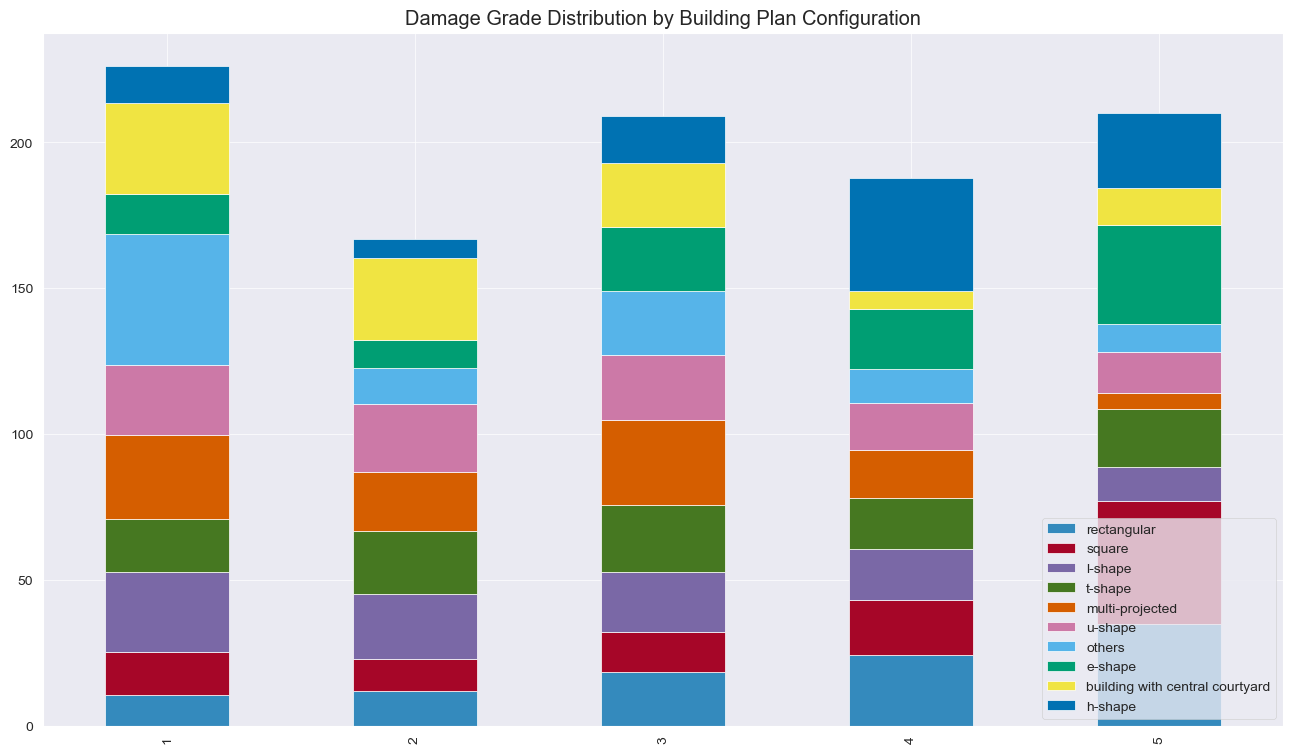

In [118]:
correlate.iloc[0:,:].plot(kind='bar', stacked=True, figsize=(16,9), title='Damage Grade Distribution by Building Plan Configuration')
plt.show()

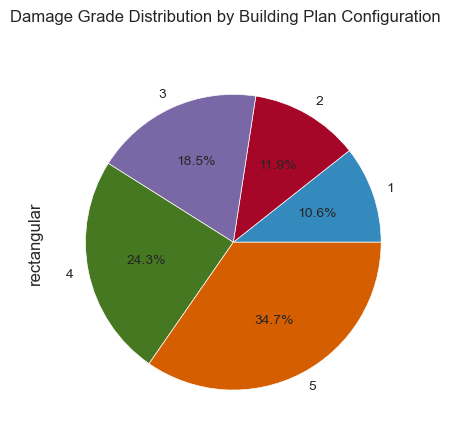

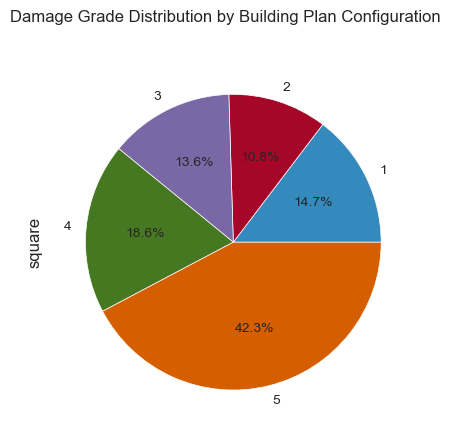

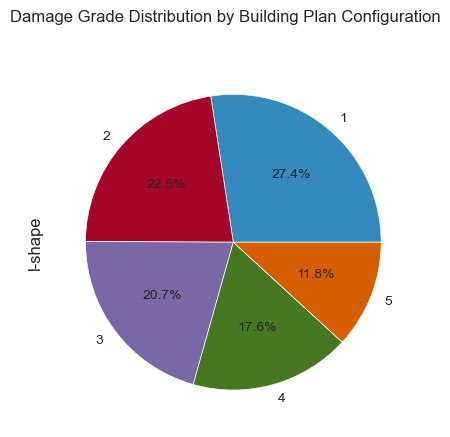

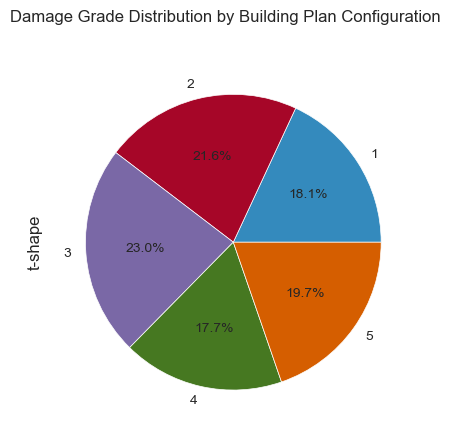

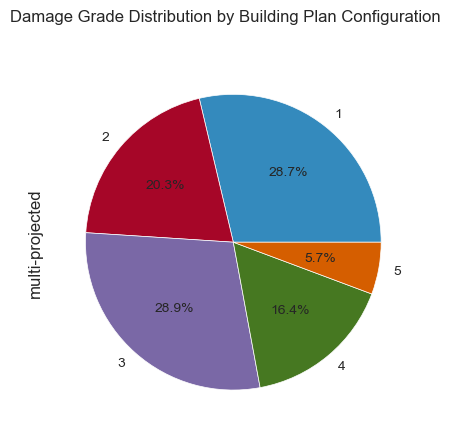

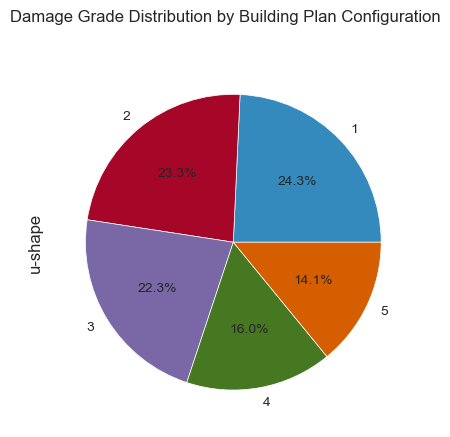

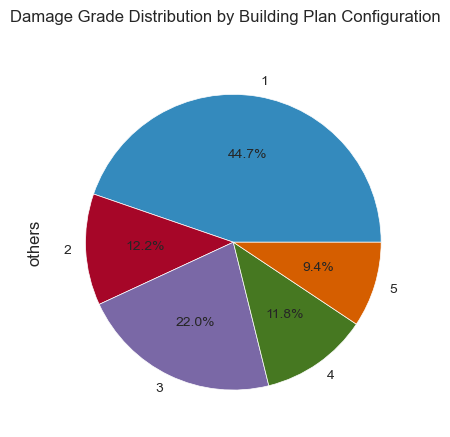

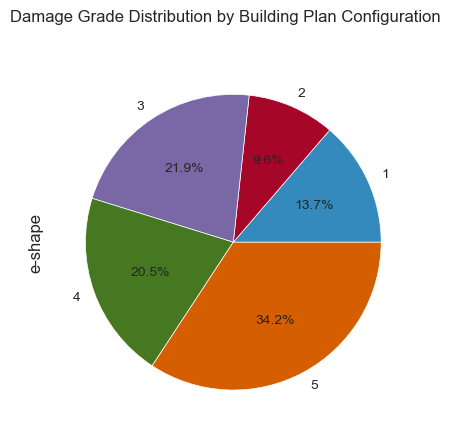

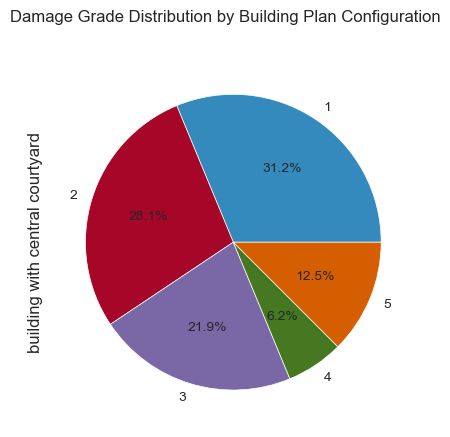

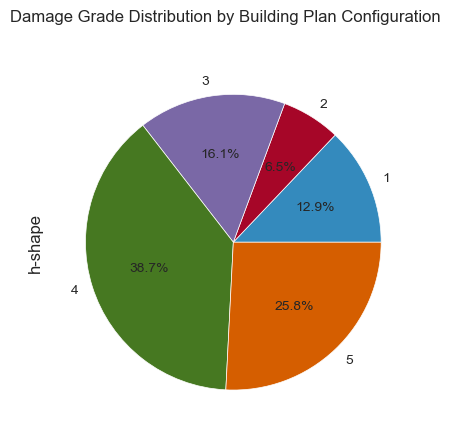

In [119]:
##fig, axes = plt.subplots( ncols=2 , nrows= 5, figsize=(20,10))
j = 0
for i, col in enumerate(correlate.iloc[0:,:]):
    correlate[col].plot(kind='pie', subplots=True,autopct='%1.1f%%', title='Damage Grade Distribution by Building Plan Configuration')
    if i  == 1:
        j = 1
    plt.show()


In [120]:
train_data.head()

,floors_before_eq(total),old_building,plinth_area(ft^2),height_before_eq(ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade,ismorethanplintharea,reconstruction,major_repair,minor_repair,no_need
0,2.0,1.0,256.0,22.0,flat,bamboo_or_timber,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,0.0,0.0,1.0,0,0,0,0,0
1,3.0,3.0,985.0,18.0,flat,mixed,bamboo_or_timber_heavy,clay_mud,wood_or_bambo_mud,0.0,square,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,5.0,0,0,0,0,0
2,2.0,7.0,300.0,14.0,flat,mixed,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,5.0,0,0,0,0,0
3,2.0,18.0,185.0,15.0,flat,mixed,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,4.0,0,0,0,0,0
4,2.0,22.0,290.0,17.0,flat,mixed,bamboo_or_timber_light,clay_mud,wood_or_bambo_mud,0.0,rectangular,0.0,0.0,non-residential,1.0,non-public,non-industrial,non-govermental,0.0,5.0,2.0,1.0,0,0,0,0,0


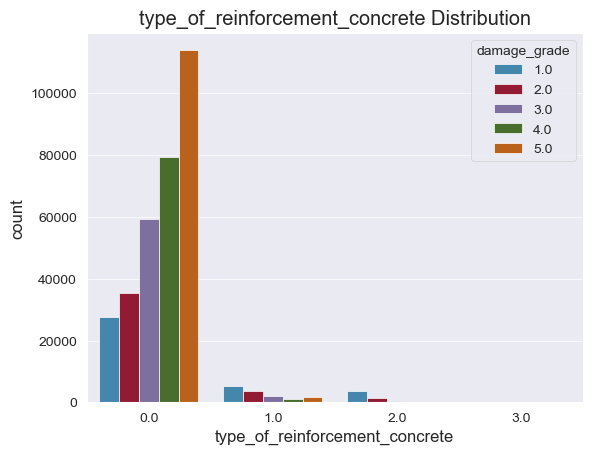

In [122]:
sns.countplot(x = train_data["type_of_reinforcement_concrete"], hue = train_data["damage_grade"])
plt.title("type_of_reinforcement_concrete Distribution")
plt.show()

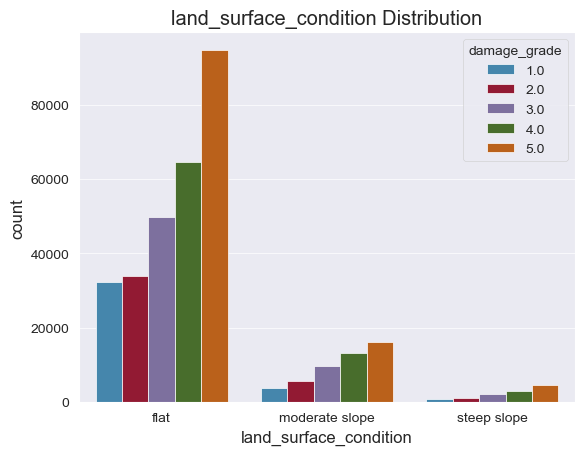

In [123]:
sns.countplot(x = train_data["land_surface_condition"], hue = train_data["damage_grade"])
plt.title("land_surface_condition Distribution")
plt.show()